1. Carga y limpieza de datos

In [3]:
# Instalación de librerías necesarias (descomenta si es necesario)
# !pip install pandas numpy matplotlib seaborn scikit-learn tensorflow kaggle kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = r'C:\Users\User\Downloads\bio\loan\loan.csv'
df = pd.read_csv(file_path)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5288\2637111473.py:11: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Preparación y codificación de la variable objetivo

In [4]:
# Diccionario de mapeo para la variable objetivo
status_map = {
    "Fully Paid": 0,
    "Charged Off": 1,
    "Late (31-120 days)": 1,
    "Default": 1,
    "Does not meet the credit policy. Status:Fully Paid": 0,
    "Does not meet the credit policy. Status:Charged Off": 1
}

# Aplica el mapeo
df['target'] = df['loan_status'].map(status_map)

# Elimina los casos NA (no entrenables)
df_model = df[df['target'].notna()].copy()

2. Preprocesamiento de datos
Elimina columnas irrelevantes (ID, texto, etc.).
Convertir variables categóricas a dummies o usa LabelEncoder.
Imputa o elimina valores nulos.

In [6]:
# Elimina columnas problemáticas ANTES de get_dummies
cols_to_drop = [
    'id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'loan_status', 'emp_title'
]
df_model = df_model.drop(columns=cols_to_drop, errors='ignore')

In [7]:
# Elimina columnas que no aportan al modelo
cols_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'loan_status']
df_model = df_model.drop(columns=cols_to_drop, errors='ignore')

# Llena nulos simples (puedes mejorar esto después)
df_model = df_model.fillna(df_model.median(numeric_only=True))

# Convierte categóricas a dummies
df_model = pd.get_dummies(df_model, drop_first=True)

3. Separar variables predictoras y objetivo

In [8]:
X = df_model.drop('target', axis=1)
y = df_model['target']

4. Separar en train/test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

5. Modelo de red neuronal (Keras/TensorFlow)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8919 - loss: 82.9613 - val_AUC: 0.9689 - val_loss: 3.8590
Epoch 2/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9783 - loss: 2.7798 - val_AUC: 0.9778 - val_loss: 3.3487
Epoch 3/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9863 - loss: 1.9125 - val_AUC: 0.9894 - val_loss: 2.9386
Epoch 4/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9815 - loss: 3.1139 - val_AUC: 0.9944 - val_loss: 1.2375
Epoch 5/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9844 - loss: 2.8587 - val_AUC: 0.9900 - val_loss: 1.8880
Epoch 6/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9847 - loss: 2.5057 - val_AUC: 0.9955 - val_loss: 1.4174
Epoch 7/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9894 - loss: 1.5532 - val_AUC: 0.9882 - val_loss: 1.6109
Epoch 8/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9869 - loss: 1.4226 - val_AUC: 0.9946 - val_loss: 0.9268
Epoch 9/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - A

6. Evaluación

In [11]:
from sklearn.metrics import roc_auc_score, classification_report

y_pred_prob = model.predict(X_test).ravel()
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred_prob > 0.5))

1679/1679 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step
AUC: 0.9975081631000573
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41942
         1.0       0.99      1.00      0.99     11764

    accuracy                           1.00     53706
   macro avg       0.99      1.00      0.99     53706
weighted avg       1.00      1.00      1.00     53706



7. Scorecard


In [12]:
# Score simple: entre 300 y 850
def prob_to_score(prob, min_score=300, max_score=850):
    return min_score + (max_score - min_score) * (1 - prob)

df_model['score'] = prob_to_score(model.predict(X).ravel())

8392/8392 ━━━━━━━━━━━━━━━━━━━━ 5s 614us/step


8. Importancia de variables


In [20]:
X_train_shap = X_train[:100].astype(np.float32)
X_test_shap = X_test[:100].astype(np.float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.376e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.318e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.935e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=7.576e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.455e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=7.273e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alph

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━

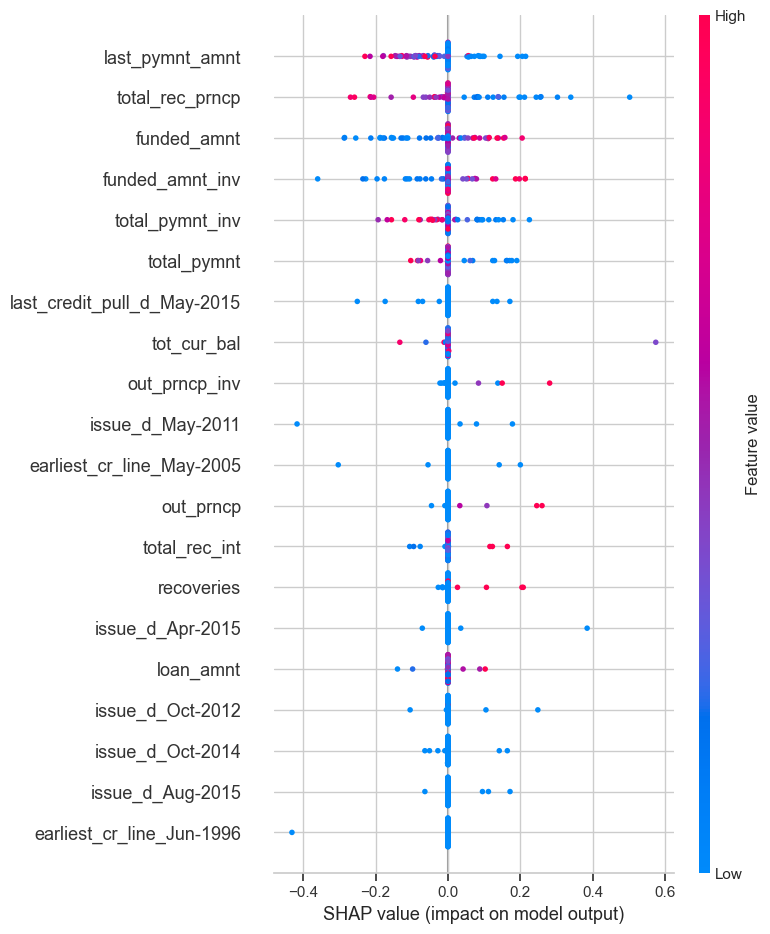

In [21]:
import shap

# Usa una función predictora que devuelva un vector
def predict_fn(x):
    return model.predict(x).flatten()

explainer = shap.KernelExplainer(predict_fn, X_train_shap)
shap_values = explainer.shap_values(X_test_shap, nsamples=100)

shap.summary_plot(shap_values, X_test_shap)

1. Importancia de las variables
Las variables están ordenadas de arriba hacia abajo según su importancia para el modelo.
En este caso, las variables más importantes son:
last_pymnt_amnt
total_rec_prncp
funded_amnt
funded_amnt_inv
total_pymnt_inv
total_pymnt

2. Efecto de los valores
Cada punto es un cliente/observación.
El color indica si el valor de la variable es alto (rojo) o bajo (azul).
El eje X muestra el impacto de ese valor en la predicción (SHAP value):
A la derecha (positivo): Aumenta la probabilidad de incumplimiento.
A la izquierda (negativo): Disminuye la probabilidad de incumplimiento.
3. Ejemplo de interpretación
Para last_pymnt_amnt:
Los valores bajos (azul) tienden a mover la predicción hacia menor riesgo (izquierda).
Los valores altos (rojo) tienden a mover la predicción hacia mayor riesgo (derecha).
Para total_rec_prncp y funded_amnt, el patrón es similar.
4. ¿Qué significa esto para tu modelo?
Variables como last_pymnt_amnt y total_rec_prncp son críticas para determinar el riesgo de incumplimiento.
Valores altos en estas variables suelen asociarse con mayor riesgo (según el modelo y los datos).
Valores bajos suelen asociarse con menor riesgo.

Explicación de las variables más importantes según SHAP

last_pymnt_amnt

Significado: Monto del último pago realizado por el cliente.

Importancia: Es la variable más influyente en el modelo. Un monto bajo en el último pago suele asociarse con menor riesgo de incumplimiento, mientras que montos altos pueden indicar dificultades para cumplir con el pago total, aumentando el riesgo.

total_rec_prncp

Significado: Total del principal (capital) recuperado hasta la fecha.

Importancia: Altamente relevante. Un mayor monto recuperado indica que el cliente ha pagado una parte significativa de su deuda, lo que puede asociarse con menor riesgo. Sin embargo, si el monto recuperado es bajo, el riesgo de incumplimiento aumenta.

funded_amnt

Significado: Monto total del préstamo otorgado al cliente.

Importancia: Es un factor importante. Préstamos de mayor monto pueden estar asociados a un mayor riesgo, ya que representan un mayor compromiso financiero para el cliente.

funded_amnt_inv

Significado: Monto del préstamo invertido por los inversores.

Importancia: Similar a funded_amnt, indica el compromiso de los inversores en el préstamo. Montos altos pueden estar relacionados con mayor riesgo si el cliente no puede cumplir con los pagos.

total_pymnt_inv

Significado: Total de pagos realizados a los inversores.

Importancia: Refleja el historial de pagos del cliente hacia los inversores. Un historial de pagos consistente (montos altos) suele asociarse con menor riesgo.

total_pymnt

Significado: Total de pagos realizados por el cliente.

Importancia: Similar a la variable anterior, indica el compromiso del cliente con el pago de su deuda. Montos altos suelen ser positivos, pero si no corresponden al avance esperado del préstamo, pueden indicar problemas.

last_credit_pull_d_May-2015

Significado: Indica si la última consulta de crédito fue en mayo de 2015.

Importancia: Puede estar relacionada con la antigüedad o el seguimiento del crédito. Fechas recientes pueden indicar monitoreo activo o problemas recientes.

tot_cur_bal

Significado: Saldo total actual de todas las cuentas del cliente.

Importancia: Un saldo alto puede indicar que el cliente tiene muchas deudas activas, lo que incrementa el riesgo de incumplimiento.

out_prncp_inv

Significado: Principal pendiente de pago a los inversores.

Importancia: Un monto alto indica que aún queda mucho por pagar, lo que puede asociarse con mayor riesgo.

issue_d_May-2011

Significado: Indica si el préstamo fue emitido en mayo de 2011.

Importancia: Puede estar relacionado con la antigüedad del préstamo y el comportamiento histórico del cliente.

earliest_cr_line_May-2005

Significado: Indica si la línea de crédito más antigua del cliente es de mayo de 2005.

Importancia: Clientes con historial crediticio más largo suelen ser menos riesgosos.

out_prncp

Significado: Principal pendiente de pago.

Importancia: Similar a out_prncp_inv, un monto alto puede indicar mayor riesgo.

total_rec_int

Significado: Total de intereses recuperados.

Importancia: Puede indicar cuánto ha pagado el cliente en intereses, lo que puede estar relacionado con la duración y el 
cumplimiento del préstamo.

recoveries

Significado: Monto recuperado después de un incumplimiento.

Importancia: Si hay recuperaciones, indica que hubo problemas de pago, lo que incrementa el riesgo.

issue_d_Apr-2015

Significado: Indica si el préstamo fue emitido en abril de 2015.

Importancia: Similar a otras variables de fecha de emisión, puede estar relacionada con cohortes de riesgo.

loan_amnt

Significado: Monto solicitado por el cliente.

Importancia: Préstamos de mayor monto pueden estar asociados a mayor riesgo.

issue_d_Oct-2012, issue_d_Oct-2014, issue_d_Aug-2015

Significado: Indican si el préstamo fue emitido en esas fechas específicas.

Importancia: Permiten identificar patrones de riesgo asociados a cohortes temporales.

earliest_cr_line_Jun-1996

Significado: Indica si la línea de crédito más antigua es de junio de 1996.

Importancia: Un historial crediticio más largo suele asociarse con menor riesgo.